# 決定木

In [1]:
import pandas as pd
import numpy as np

import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus
from IPython.display import Image
import matplotlib.pyplot as plt

In [2]:

#=============================================
# Inputファイル情報
#=============================================
INPUT_folder = '2_data'        
INPUT_DNAME = '11.csv'
#=============================================
# Outputファイル情報
#=============================================
OUTPUT_folder = '3_output'
#=============================================
# カレントパス
#=============================================
current_dpath = os.getcwd()
#print('INFO:current_path:' + current_dpath)

#=============================================
# パレントパス
#=============================================
parent_dpath =os.path.sep.join(current_dpath.split(os.path.sep)[:-1])

#print('INFO:parent_path:' + parent_dpath)   

#=============================================
# Inputデータファイル Path
#=============================================
input_dpath =os.path.sep.join([parent_dpath + '\\' + INPUT_folder,INPUT_DNAME])
#print('INFO:input_path:' + input_dpath) 

#=============================================
# Outputデータファイル Path
#=============================================
output_dpath =parent_dpath + '\\' + OUTPUT_folder
#print('INFO:output_path:' + output_dpath)   



In [3]:
#=============================================
# サンプルデータ読み込む
#=============================================
df = pd.read_csv(input_dpath,encoding='shift-JIS')
df = pd.DataFrame(df)

#df.head(3)
df

,ID,family,age,gender,income,car,cluster
0,890,2,55,2,600,toyota,1
1,790,2,55,2,600,toyota,1
2,690,2,55,2,600,toyota,1
3,640,2,55,2,600,toyota,1
4,540,2,55,2,600,toyota,1
...,...,...,...,...,...,...,...
215,343,2,40,2,600,foreign car,1
216,943,1,40,2,600,foreign car,1
217,793,1,40,2,600,foreign car,1
218,93,1,40,2,600,foreign car,1


In [4]:
#=============================================
#欠損を調べる　　不要
#=============================================
#df.isna().sum()

In [5]:
#=============================================
#説明変数 だけにする
#=============================================
X_df = df.drop(['ID','car', 'cluster'], axis=1)

#=============================================
#目的変数 
#=============================================
y_df = df['car']

#正しく分割できたかを確かめる
display(X_df.head())
print(y_df.head())

,family,age,gender,income
0,2,55,2,600
1,2,55,2,600
2,2,55,2,600
3,2,55,2,600
4,2,55,2,600


0    toyota
1    toyota
2    toyota
3    toyota
4    toyota
Name: car, dtype: object


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, random_state=0)

print(len(X_train))
print(len(X_test))

165
55


In [7]:
# 決定木モデルを構築するクラスを初期化
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# 決定木モデルを生成
model = clf.fit(X_train, y_train)

# 訓練・テストそれぞれの正解率を算出
print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

正解率(train):0.564
正解率(test):0.564


In [8]:


def add_class_legend(legend_text, x=0.02, y=0.98):
    """
    決定木の凡例テキストを現在のFigureに追加する。
    """
    plt.gcf().text(
        x, y,
        legend_text,
        fontsize=13,
        va="top",
        ha="left",
        bbox=dict(
            boxstyle="round,pad=0.5",
            fc="lightyellow",
            ec="gray",
            lw=1
        )
    )

In [9]:

# 決定木を描画
model.fit(X_df, y_df)


DecisionTreeClassifier(max_depth=3, random_state=0)

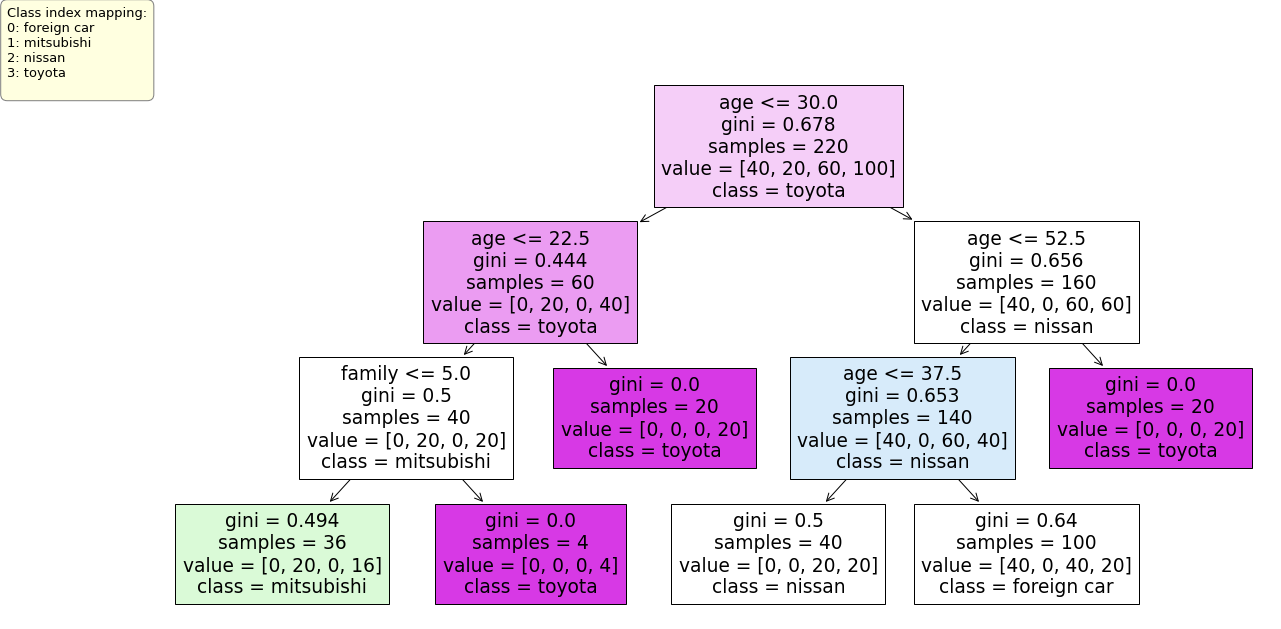

In [10]:


# クラスのインデックス対応表を作成
legend_text = "Class index mapping:\n"
for idx, class_label in enumerate(model.classes_):
    legend_text += f"{idx}: {class_label}\n"
    

# 比率なし
plt.figure(figsize=(20,10))
tree.plot_tree(
    model,
    feature_names=X_df.columns,
    class_names=model.classes_.astype(str),
    filled=True,
    max_depth=6
)

add_class_legend(legend_text)  # ←ここで関数を呼ぶ

plt.savefig("decision_tree_N.png", dpi=300)
plt.show()


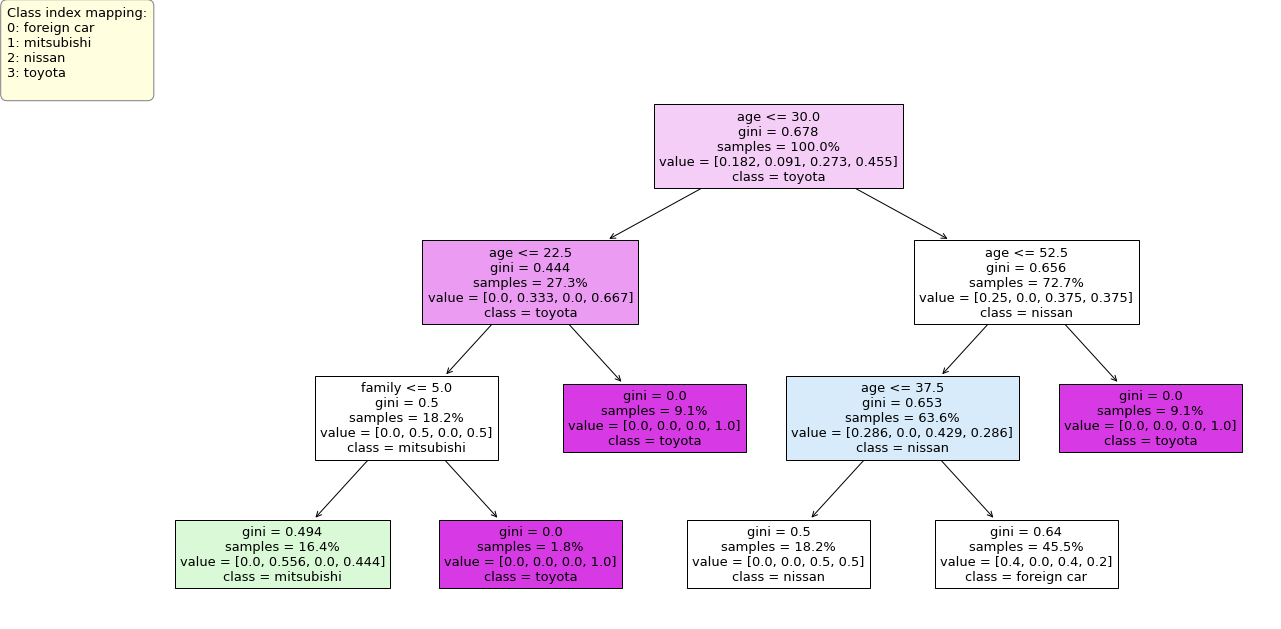

In [12]:

# 比率あり
plt.figure(figsize=(20,10))
tree.plot_tree(
    model,
    feature_names=X_df.columns,
    class_names=model.classes_.astype(str),
    filled=True,
    max_depth=6,
    proportion=True
)

add_class_legend(legend_text)  # ←再利用できる

plt.savefig("decision_tree.png", dpi=300)
plt.show()
